## TASK 1:
<b>Rewrite given binary tree into a binary search tree, without changing its structure.</b><br> 
Example:<br>
1. Before:
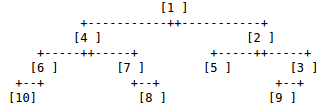

2. After:
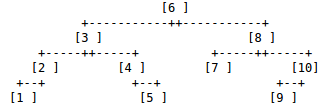

### Input data format:
In the array, all nodes of tree are written in pre-order. <br>
Zero value means absence of leaf.<br>
Example:
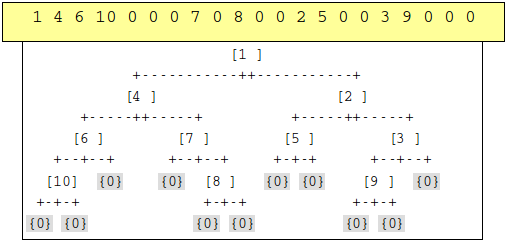

### Solution algorithm:
0. Rewrite given array into a binary tree.
1. Walk the given tree in-order and write all items into array.
2. Sort array in ascending order.
3. Walk the tree in-order once again, placing values from the sorted array into tree nodes while walking.

## TASK 2
<b>Print all k-sum paths in a binary tree.</b> <br>
(Print every path in the tree with sum of the nodes in the path as <b>k</b>)<br>
<br>
Example:<br>
k = 9<br>
Paths: (6,3), (4,5), (9)
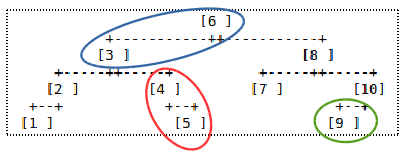

In [265]:
import numpy as np

In [266]:
def read_from_file(filename):#read from file into array
    with open(f'{filename}.txt', 'r') as f:
        data = f.read()
        l = data.split()
        res = [int(item) for item in l]
    return res

In [267]:
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.parent = None
        self.key = key

        
class Tree:
    def __init__(self):
        self.root = None
    
    def add(self, z): #classic function for adding items to the binary search tree
        z = Node(z)
        y = None
        x = self.root
        while x != None:
            y = x
            if z.key <= x.key:
                x = x.left
            else:
                x = x.right
        z.parent = y
        if y == None:
            self.root = z
        elif z.key <= y.key:
            y.left = z
        else:
            y.right = z
            
    def add_multiple(self, arr): #add elements from array in a classic way
        for item in arr:
            self.add(item)

            
    def preorder_walk(self, node, arr): # pre-order tree walk with writing node.keys to array
        if node != None:
            arr.append(node.key)
            self.preorder_walk(node.left, arr)
            self.preorder_walk(node.right, arr)
    
    def postorder_walk(self, node, arr): # post-order tree walk with writing node.keys to array
        if node != None:
            self.postorder_walk(node.left, arr)
            self.postorder_walk(node.right, arr)
            arr.append(node.key)
            
    def inorder_walk(self, node, arr): # in-order tree walk with writing node.keys to array
        if node != None:
            self.inorder_walk(node.left, arr)
            arr.append(node.key)
            self.inorder_walk(node.right, arr)
            
    def get_leaves(self, node, arr):  #make an array of tree leaves in right-to-left order
        if node != None:
            if (not node.left and not node.right):
                arr.append(node.key)
            if node.left: # If left child exists, check for leaf recursively
                self.get_leaves(node.left, arr)
            if node.right: # If right child exists, check for leaf recursively
                self.get_leaves(node.right, arr)
    
    
 ##### TASK 1: Rewrite given binary tree into a binary search tree, keeping its structure unchanged ####

    def inorder_walk_insert(self, node, arr):  #write sorted array into a binary search tree.
        if node != None:
            self.inorder_walk_insert(node.left, arr)
            node.key = arr[0]
            arr.pop(0)
            self.inorder_walk_insert(node.right, arr)
               
            
    def add_from_arr(self, arr): #write given array into a binary tree
        self.root = Node(arr[0])
        y = self.root
        flag = False #False=left, True=right
        for i in range(1, len(arr)):
            if arr[i] == 0 and flag == False:
                flag = True
            elif arr[i] == 0 and flag == True:
                if i != len(arr) - 1 :    
                    y = y.parent
                    while y.right != None:
                            y = y.parent
            else:
                x = Node(arr[i])
                if flag == False:
                    y.left = x
                    x.parent = y
                    y = x
                elif flag == True:
                    while y.right != None:
                        y = y.parent

                    y.right = x
                    x.parent = y
                    y = x
                    flag = False       


### TASK 2: Print all k-sum paths in a binary tree #####

    def print_k_path(self, node, path, k):
        if node != None:
            path.append(node.key)# add current node to the path

            self.print_k_path(node.left, path, k) #check if there's any k sum path in the left sub-tree.

            self.print_k_path(node.right, path, k) #check if there's any k sum path in the right sub-tree.

            # check if there's any k sum path that terminates at this node.
            # Traverse the entire path as there can be negative elements too.
            f = 0
            for j in range(len(path) - 1, -1, -1):
                f += path[j]

                if (f == k): # If path sum is k, print the path
                    print(path[j:])            
            path.pop(-1) # Remove the current element from the path

In [268]:
ar = read_from_file("task")
# ar = read_from_file("input_100c")
# print(ar)
print(len(ar))

print("\nTASK 1")
tree = Tree()
tree.add_from_arr(ar)

inorder_arr = []
tree.inorder_walk(tree.root, inorder_arr)
# print("inorder_arr=", inorder_arr)

inorder_sorted = list(np.sort(inorder_arr))
# print("inorder_sorted=", inorder_sorted)

tree.inorder_walk_insert(tree.root, inorder_sorted)
inorder_arr = []
tree.inorder_walk(tree.root, inorder_arr)
# print("NEW inorder_arr=", inorder_arr)

leaves_arr = []
tree.get_leaves(tree.root, leaves_arr)
# print("leaves_arr=", leaves_arr)

print("NEW root:", tree.root.key)
print("first 3 leaves:", leaves_arr[:3])
print("last 3 leaves:", leaves_arr[-3:])

print("\nTASK 2")
path = []
tree.print_k_path(tree.root, path, 1940)

2001

TASK 1
NEW root: 490
first 3 leaves: [2, 4, 7]
last 3 leaves: [992, 996, 999]

TASK 2
[490, 258, 366, 424, 402]
